In [74]:
from __future__ import division

import glob
import re
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

% matplotlib inline

In [75]:
plt.style.use('ggplot')

In [76]:
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['axes.facecolor']='white'
mpl.rcParams['axes.edgecolor']='k'
mpl.rcParams['axes.linewidth']=3
mpl.rcParams['font.size']=12
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['text.color'] = 'k'
#mpl.rcParams['xtick.major.width'] = 2
#mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['xtick.major.size'] = 3.6
mpl.rcParams['ytick.major.size'] = 3.6
mpl.rcParams['xtick.color']='k'
mpl.rcParams['ytick.color']='k'
mpl.rcParams['axes.labelcolor']='k'

In [77]:
def makeCmap(hexColour,name,zeroColour='#FFFFFF'):
    r0,g0,b0=mpl.colors.hex2color(zeroColour)
    r,g,b=mpl.colors.hex2color(hexColour)
    cdict = {'red':   ((0.0, r0, r0),
                   (1.0, r, r)),
         'green': ((0.0, g0, g0),
                   (1.0, g, g)),
         'blue':  ((0.0, b0, b0),
                   (1.0, b, b))
        }
    cmap = mpl.colors.LinearSegmentedColormap(name,cdict)
    return cmap

In [78]:
# UNUSED! Just leaving thsi here in case people want to copy their colour schemes over
files=['galaxiesDM','galaxiesGas','galaxiesStars','galaxiesBHs','empiricalGal','SMBHs','chabrierImf',
       'planetsRVbins','planetsRVbins_univ','planetsMicrolensing','planetsMicrolensing_univ',
      'planetsRVbins_Mdwarfs','planetsRVbins_Mdwarfs_univ',
      'planetsTransitBins_GK','planetsTransitBins_GK_univ',
      'planetsTransitBins_M','planetsTransitBins_M_univ']
colours=['#FF6542','#2A9D8F','#E9C46A','#264653','g','k','b','#1A936F','#114B5F','#EE964B','#F95738',
        '#843B62','#211940','#118AB2','#073B4C','#F67E7D','#D65151']
text=[r'Galaxies ($M_{DM}$)',r'Galaxies ($M_g$)',r'Galaxies ($M_*$)',r'Galaxies ($M_{BH}$)','Galaxies (obs)','Super-Massive Black Holes','Chabrier',
      'RV planets [GK, solar neighborhood]','RV planets [GK, universe]',
     'Microlensing planets [Milky Way]','Microlensing planets [universe]',
     'RV planets [M, solar neighborhood]','RV planets [M, universe]',
     'Transiting planets [GK, Kepler]','Transiting planets [GK, universe]',
     'Transiting planets [M, Kepler]','Transiting planets [M, universe]']
textPos=[[1e11,1e-28],[1e11,1e-26],[1e11,1e-24],[1e11,1e-22],[1e11,1e-20],[1e11,1e-18],[1e11,1e-16],[1e11,1e-14],[1e11,1e-12],[1e11,1e-10],[1e11,1e-8],
         [1e11,1e-6],[1e11,1e-4],[1e11,1e-2],[1e11,1e0],[1e11,1e2],[1e11,1e4]]

In [79]:
def plotBackground(thisPlot,x0,y0,colour,zorder0):
    cmap=makeCmap('#011627','name')
    yMin=y0*np.power(x0/1e20,2)
    yMax=y0*np.power(x0/1e-20,2)
    nColours=25
    change=0.01
    for i in range(nColours-1):
        thisPlot.fill([1e-20,1e-20,1e20],[yMax*change**(i),yMin*change**(i),yMin*change**(i)],c=cmap((i+1)/nColours),zorder=(i+1)+zorder0)
    
    newZord = i+1+zorder0
    return thisPlot, newZord

data/chabrierImf.txt
['# ', 'Chabrier IMF', '#3D8EDB', '--', '\n']
data/empiricalGal.txt
['#', 'Galaxies (Observed)', 'y', '-', '\n']
data/galaxiesBHs.txt
['#', 'Galaxies (Black Hole Mass)', '#264653', '-', '\n']
data/galaxiesDM.txt
['#', 'Dark Matter Halos', '#FF6542', '-', '\t\n']
data/galaxiesGas.txt
['#', 'Galaxies (Gas Mass)', '#2A9D8F', '-', '\t\n']
data/galaxiesStars.txt
['#', 'Galaxies (Stellar Mass)', '#E9C46A', '-', '\n']
data/SMBHs.txt
['#', 'Super-Massive Black Holes', 'k', '-', '']


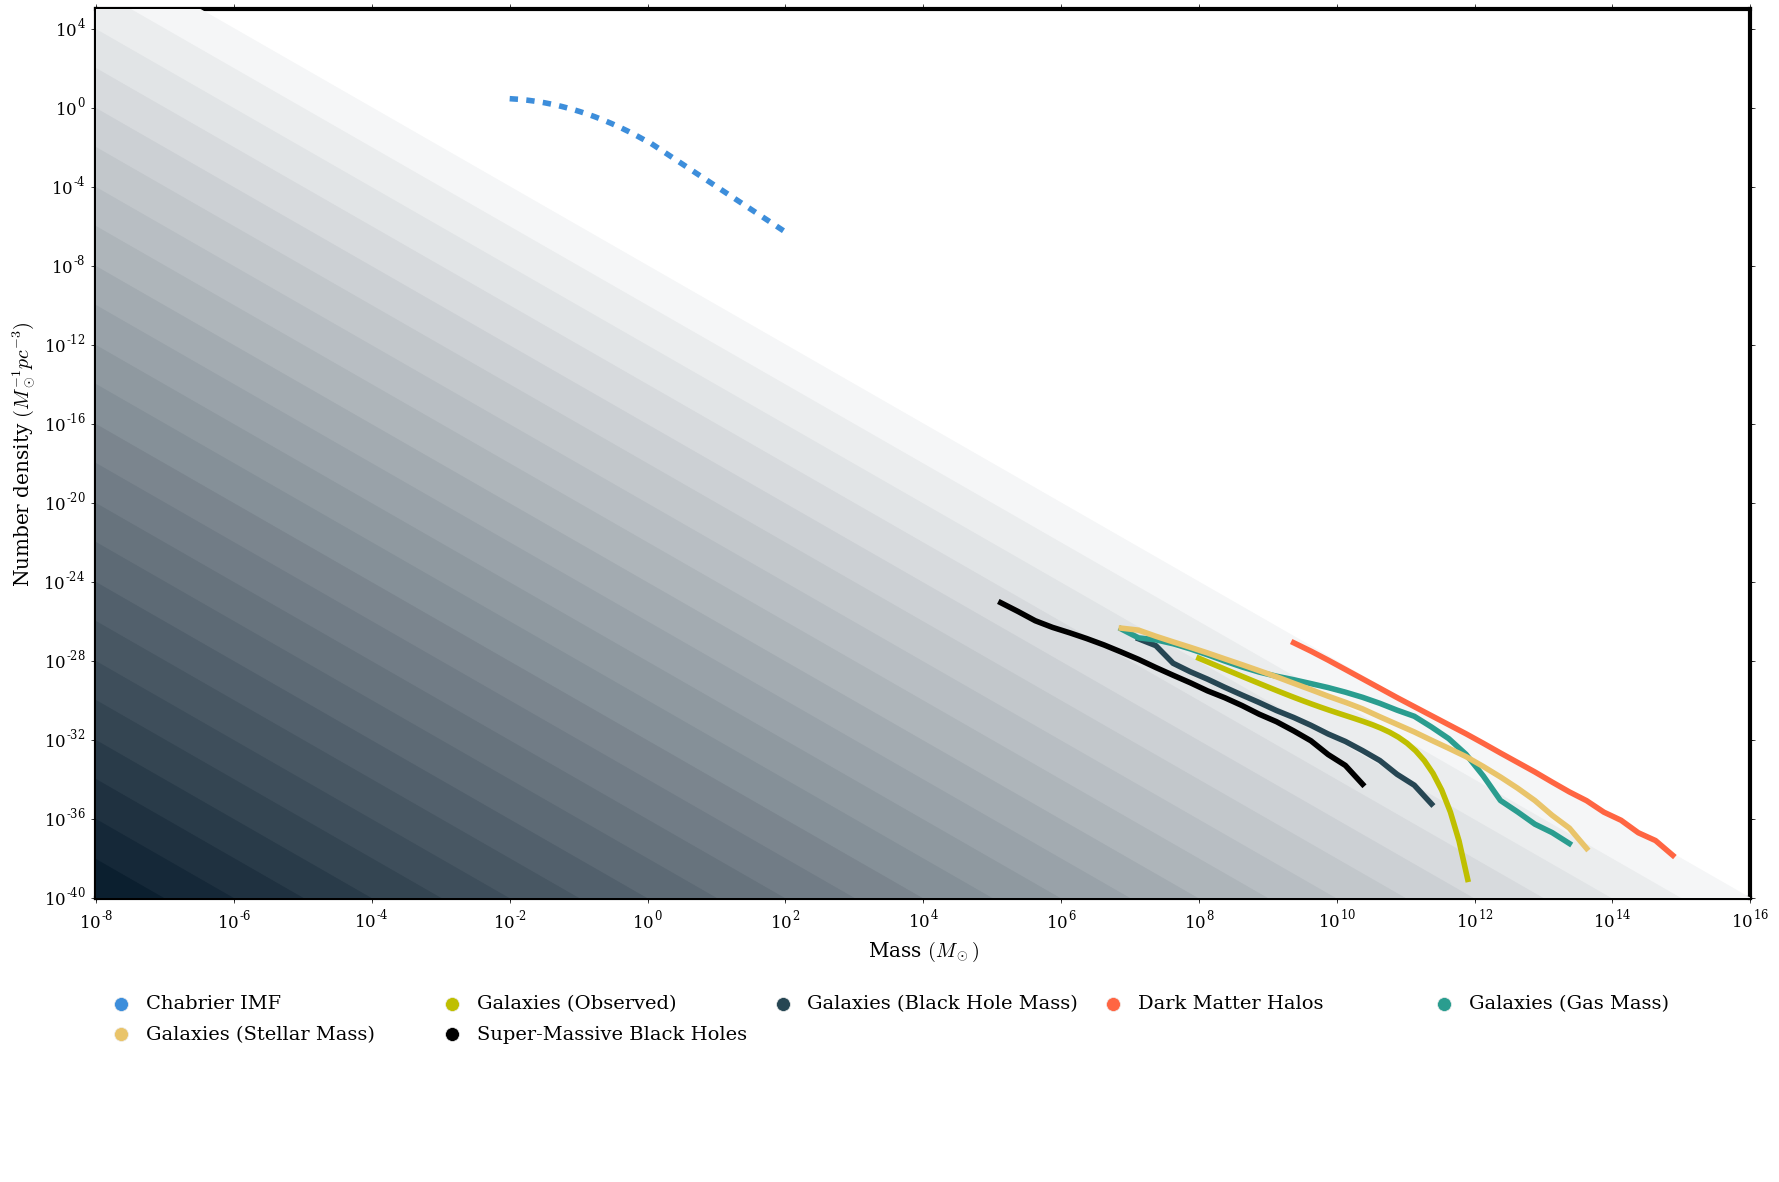

In [93]:
zord = 2

fig = plt.figure(figsize=(18,12))
nGrid = mpl.gridspec.GridSpec(5,1)
nPlot = plt.subplot(nGrid[0:4,0])
sPlot = plt.subplot(nGrid[4,0])

nPlot.set_xscale('log')
nPlot.set_yscale('log')
nPlot.set_ylim(1e-40,1e5)
nPlot.set_xlim(1e-8,1e16)
nPlot.set_xlabel(r'Mass $(M_\odot)$')
nPlot.set_ylabel(r'Number density $(M_\odot^{-1} pc^{-3})$')
nPlot.grid("off")

sPlot.axis('off')
sPlot.set_xlim(0,1)
sPlot.set_ylim(0,1)

nPlot, zord = plotBackground(nPlot,1e16,1e-40,'k',zorder0=zord)
nFile=0
for fileName in glob.glob('data/*.txt'):
    print(fileName)
    with open(fileName, 'r') as f:
        footer = f.readlines()[-1]
        #print(re.split(r'/+', footer))
    _,name,colour,linestyle,_=re.split(r'/+', footer)
    data=np.genfromtxt(fileName)
    data=data[data[:,1]>0,:]
    nPlot.plot(data[:,0],data[:,1],zorder=zord,c=colour,ls=linestyle)
    zord+=1
    #nPlot.text(textPos[index][0],textPos[index][1],text[index],color=colours[index])
    if np.shape(data)[1] > 2: #if uncertainty columns are included
        xs = np.concatenate((data[:,0],data[:,0][::-1]))
        ys = np.concatenate(((data[:,1]+data[:,2]),(data[:,1]-data[:,3])[::-1]))
        nPlot.fill(xs, ys, alpha=0.25,zorder=zord,c=colour)
        zord+=1
    
    xText=0.03+0.2*(nFile % 5)
    yText=0.9-0.2*int(nFile/5)
    sPlot.scatter(xText-0.015,yText+0.03,s=100,c=colour)
    sPlot.text(xText,yText,name,fontsize=14)
    nFile+=1

plt.tight_layout()
plt.savefig('plot.pdf')
plt.show()

In [ ]:
# one annoying thing about the above plot is that it doesn't seem to be possible to drawn the axes on top of the shaded triangles...

# another thing to do: Once various planet lines are on there, see if they add up to the total predicted by the planet simulation paper